In [7]:
!pip install spacy scikit-learn matplotlib seaborn ipywidgets
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 3.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [8]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


📊 Cluster Assignments:
         Word  Cluster     PCA_1     PCA_2
0       apple        1  3.908828 -0.643081
1      banana        1  3.908828 -0.643081
2       grape        1  3.433176 -0.382455
3        king        2 -4.165607 -3.019354
4       queen        0 -3.219690  2.318704
5      prince        2 -4.165607 -3.019354
6  watermelon        1  3.908828 -0.643081
7      person        2 -2.197795  0.412762
8         cat        3 -1.410960  5.618941


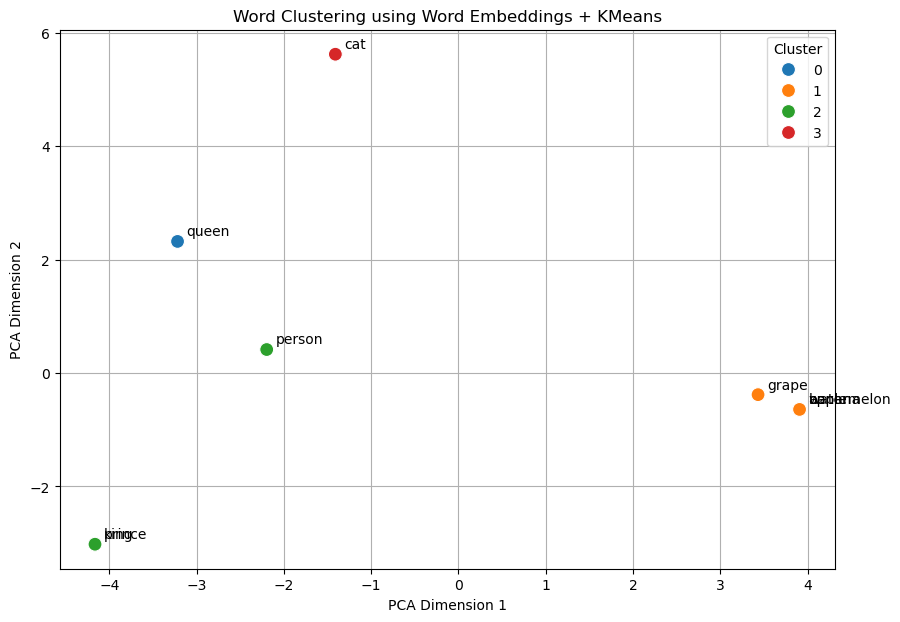

In [9]:
# 📦 Imports
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd

# 🧠 Load spaCy's medium English model (includes word vectors)
nlp = spacy.load("en_core_web_md")

# ✍️ Input: List of words to cluster
words = ["apple", "banana", "grape", "king", "queen", "prince", "watermelon", "person", "cat"]

# 🔢 Extract word vectors
word_vectors = [nlp(word).vector for word in words]

# ⚙️ Clustering using KMeans
k = 4  # Number of clusters — adjust as needed
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
labels = kmeans.fit_predict(word_vectors)

# 🔍 Reduce dimensions for visualization (2D)
pca = PCA(n_components=2)
points_2d = pca.fit_transform(word_vectors)

# 🧾 Show cluster assignments as a table
df = pd.DataFrame({
    "Word": words,
    "Cluster": labels,
    "PCA_1": points_2d[:, 0],
    "PCA_2": points_2d[:, 1]
})
print("📊 Cluster Assignments:")
print(df)

# 🎨 Plot the clustered words
plt.figure(figsize=(10, 7))
sns.scatterplot(x=points_2d[:, 0], y=points_2d[:, 1], hue=labels, palette="tab10", s=100)

# Annotate each point with the word
for i, word in enumerate(words):
    plt.text(points_2d[i, 0]+0.1, points_2d[i, 1]+0.1, word)

plt.title("Word Clustering using Word Embeddings + KMeans")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()



